<a href="https://colab.research.google.com/github/bheath015/Protein-Atlas-Image-Classification/blob/vidula/ConvertDataToNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
def data_to_numpy(directory):
  
  
  
  
  return data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
directory_train = 'gdrive/My Drive/train'
directory_test = 'gdrive/My Drive/test'

for 

TypeError: ignored

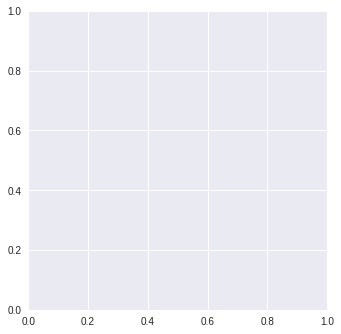

In [0]:
# make sure can access and display image
image_path = 'gdrive/My Drive/train/0a0af552-bbb7-11e8-b2ba-ac1f6b6435d0_blue.png'
plt.figure()
plt.imshow(image_path) 
plt.show()  